# Data imputation:

Download the dataset credit-data-post-import.csvPreview the document, randomly split your dataset in two datasets: training (75% observations) and testing (25% observations). We'll use the training set to calibrate our model and then use the test set to evaluate how effective it is.

Split our training data into 2 groups; data containing nulls and data not containing nulls on the monthly_income variable. Train on the latter and make 'predictions' on the null data to impute monthly_income using a regression algorithm with the variables 'number_real_estate_loans_or_lines' and 'number_of_open_credit_lines_and_loans'.

Save your train and test datasets in the csv files: credit-data-trainingset.csv and credit-data-testset.csv.

For this first part, the report can simply compare the number of observations of each dataset (train and test) before and after the correction of null values.

# Credit risk:
In this second part of this exercise, you must determine whether you will give a loan to a client based on his/her default history using the variable serious_dlqin2yrs (serious delinquency rate 2years: 1 defaults, 0 otherwise).

Using only the credit-data-trainingset.csv data, you must compare the accuracy of the following algorithms using cross-validation (cross_val_score) and select the algorithm with the highest accuracy:

- Logistic regression (sklearn.linear_model.LogisticRegression) using penalty (regularization) L1
- Logistic regression (LinearSVC) using penalty (regularization) L2
- SVM using penalty (regularization) L2
- Neural networks

Use the best model and select the best parameters using grid search (GridSearchCV).

Train your best model with the training dataset (credit-data-trainingset.csv).

Test your model using the test dataset (credit-data-testset.csv) and show its accuracy.

Build the ROC (include the area under the ROC curve), the cumulative response and lift curves for the 4 algorithms mentioned above.

# Part1 Data imputation:

In [1]:
# First to load the data 
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pylab as plt
%matplotlib inline

df = pd.read_csv("credit-data-post-import.csv")

In [2]:
# See the basic information of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
serious_dlqin2yrs                              150000 non-null int64
revolving_utilization_of_unsecured_lines       150000 non-null float64
age                                            150000 non-null int64
number_of_time30-59_days_past_due_not_worse    150000 non-null int64
debt_ratio                                     150000 non-null float64
monthly_income                                 120269 non-null float64
number_of_open_credit_lines_and_loans          150000 non-null int64
number_of_times90_days_late                    150000 non-null int64
number_real_estate_loans_or_lines              150000 non-null int64
number_of_time60-89_days_past_due_not_worse    150000 non-null int64
number_of_dependents                           150000 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB
None


We find that the data has 150000 rows and 11 columns. Moreover, only the variable monthly_income has null.                             

In [3]:
# Split the data into training set and test set
is_test = np.random.uniform(0, 1, len(df)) > 0.75
train = df[is_test==False]
test = df[is_test==True]

In [4]:
print('The row number of training set is %s' % len(train))
print('The row number of tset set is %s' % len(test))

The row number of training set is 112706
The row number of tset set is 37294


We will split our data into 2 groups; data containing nulls and data not containing nulls we'll train on the latter and make'predictions' on the null data to impute monthly_income

In [5]:
from sklearn.neighbors import KNeighborsRegressor
income_imputer = KNeighborsRegressor(n_neighbors=1) 
train_with_monthly_income = train[train.monthly_income.isnull()==False]
train_with_null_monthly_income = train[train.monthly_income.isnull()==True]

In [6]:
# We see the corrolation between monthly_income and others variable
train_with_monthly_income.corr().ix[:,5]

/Users/lilinsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


serious_dlqin2yrs                             -0.018011
revolving_utilization_of_unsecured_lines       0.007837
age                                            0.033985
number_of_time30-59_days_past_due_not_worse   -0.009404
debt_ratio                                    -0.025572
monthly_income                                 1.000000
number_of_open_credit_lines_and_loans          0.081949
number_of_times90_days_late                   -0.011788
number_real_estate_loans_or_lines              0.108507
number_of_time60-89_days_past_due_not_worse   -0.010182
number_of_dependents                           0.058007
Name: monthly_income, dtype: float64

We find that the most two relative variable with monthly_income is 'number_of_open_credit_lines_and_loans' and 'number_real_estate_loans_or_lines' 

In [7]:
# Using a regression algorithm with the variables 'number_real_estate_loans_or_lines' 
# and 'number_of_open_credit_lines_and_loans'.
cols = ['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']
income_imputer.fit(train_with_monthly_income[cols], train_with_monthly_income.monthly_income)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

Replace the mising values:


In [8]:
new_values = income_imputer.predict(train_with_null_monthly_income[cols])
train_with_null_monthly_income['monthly_income'] = new_values

/Users/lilinsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
train_with_null_monthly_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22335 entries, 6 to 149992
Data columns (total 11 columns):
serious_dlqin2yrs                              22335 non-null int64
revolving_utilization_of_unsecured_lines       22335 non-null float64
age                                            22335 non-null int64
number_of_time30-59_days_past_due_not_worse    22335 non-null int64
debt_ratio                                     22335 non-null float64
monthly_income                                 22335 non-null float64
number_of_open_credit_lines_and_loans          22335 non-null int64
number_of_times90_days_late                    22335 non-null int64
number_real_estate_loans_or_lines              22335 non-null int64
number_of_time60-89_days_past_due_not_worse    22335 non-null int64
number_of_dependents                           22335 non-null float64
dtypes: float64(4), int64(7)
memory usage: 2.0 MB


The above show that we have filled the null value in the column monthly_income.

In [10]:
# combine the data back together
train = train_with_monthly_income.append(train_with_null_monthly_income)
len(train)

112706

In [11]:
test['monthly_income_imputed'] = income_imputer.predict(test[cols])

/Users/lilinsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
test['monthly_income'] = np.where(test.monthly_income.isnull(), test.monthly_income_imputed,test.monthly_income)

/Users/lilinsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
print (pd.value_counts(train.monthly_income.isnull()))
print (pd.value_counts(test.monthly_income.isnull()))

False    112706
Name: monthly_income, dtype: int64
False    37294
Name: monthly_income, dtype: int64


So we have filled all missing data 

In [14]:
# Save train and test datasets in the csv files: credit-data-trainingset.csv and credit-data-testset.csv.
train.to_csv("credit-data-trainingset.csv", index=False)
test.to_csv("credit-data-testset.csv", index=False)

# Part2 Credit risk:
In this second part of this exercise, you must determine whether you will give a loan to a client based on his/her default history using the variable serious_dlqin2yrs (serious delinquency rate 2years: 1 defaults, 0 otherwise).

Using only the credit-data-trainingset.csv data, you must compare the accuracy of the following algorithms using cross-validation (cross_val_score) and select the algorithm with the highest accuracy:

- Logistic regression (sklearn.linear_model.LogisticRegression) using penalty (regularization) L1
- Logistic regression (LinearSVC) using penalty (regularization) L2
- SVM using penalty (regularization) L2
- Neural networks

Use the best model and select the best parameters using grid search (GridSearchCV).

Train your best model with the training dataset (credit-data-trainingset.csv).

Test your model using the test dataset (credit-data-testset.csv) and show its accuracy.

Build the ROC (include the area under the ROC curve), the cumulative response and lift curves for the 4 algorithms mentioned above.

In [15]:
df_train = pd.read_csv('credit-data-trainingset.csv')

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112706 entries, 0 to 112705
Data columns (total 11 columns):
serious_dlqin2yrs                              112706 non-null int64
revolving_utilization_of_unsecured_lines       112706 non-null float64
age                                            112706 non-null int64
number_of_time30-59_days_past_due_not_worse    112706 non-null int64
debt_ratio                                     112706 non-null float64
monthly_income                                 112706 non-null float64
number_of_open_credit_lines_and_loans          112706 non-null int64
number_of_times90_days_late                    112706 non-null int64
number_real_estate_loans_or_lines              112706 non-null int64
number_of_time60-89_days_past_due_not_worse    112706 non-null int64
number_of_dependents                           112706 non-null float64
dtypes: float64(4), int64(7)
memory usage: 9.5 MB


In [17]:
df_train.head(3)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


# P2-1 Using cross-validation (cross_val_score) and select the algorithm with the highest accuracy:

- Logistic regression (sklearn.linear_model.LogisticRegression) using penalty (regularization) L1
- Logistic regression (LinearSVC) using penalty (regularization) L2
- SVM using penalty (regularization) L2
- Neural networks

In [18]:
feature = ['revolving_utilization_of_unsecured_lines', 'age',
           'number_of_time30-59_days_past_due_not_worse', 'debt_ratio',
           'monthly_income', 'number_of_open_credit_lines_and_loans',
           'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
           'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents']
target = ['serious_dlqin2yrs']
X = df_train[feature]
y = df_train[target]
y = y.values.ravel()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
Log_L1 = LogisticRegression(penalty='l1', C=1, solver='liblinear',max_iter=10000)
Log_L2 = LogisticRegression(penalty='l2', C=1, solver='liblinear',max_iter=10000)
SVM_L2 = LinearSVC(penalty='l2',C=1.0,max_iter=10000)
NN = MLPClassifier(solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(100,), random_state=1)

In [20]:
# Using cross-validation (cross_val_score) and select the algorithm with the highest accuracy:
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(Log_L1 , X, y, scoring="accuracy", cv=10)
score2 = cross_val_score(Log_L2 , X, y, scoring="accuracy", cv=10)
score3 = cross_val_score(SVM_L2 , X, y, scoring="accuracy", cv=10)
score4 = cross_val_score(NN , X, y, scoring="accuracy", cv=10)

print ("Cross Validated Accuracy for LogisticRegression_L1 : %0.3f +/- %0.3f" % (score1.mean(), score1.std()))
print ("Cross Validated Accuracy for LogisticRegression_L2 : %0.3f +/- %0.3f" % (score2.mean(), score2.std()))
print ("Cross Validated Accuracy for Svm_L2: %0.3f +/- %0.3f" % (score3.mean(), score3.std()))
print ("Cross Validated Accuracy for Neural networks: %0.3f +/- %0.3f" % (score4.mean(), score4.std()))

/Users/lilinsen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lilinsen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lilinsen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lilinsen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lilinsen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase th

Cross Validated Accuracy for LogisticRegression_L1 : 0.934 +/- 0.001
Cross Validated Accuracy for LogisticRegression_L2 : 0.934 +/- 0.001
Cross Validated Accuracy for Svm_L2: 0.850 +/- 0.125
Cross Validated Accuracy for Neural networks: 0.904 +/- 0.077


* The result from the cross-validation (cross_val_score) above shows that the Logistic Regression is the algorithm with the highest accuracy

# P2-2 Build the ROC (include the area under the ROC curve), the cumulative response and lift curves for the 4 algorithms mentioned above:

In [21]:
# Load in the data
df_train = pd.read_csv('credit-data-trainingset.csv')
df_test = pd.read_csv('credit-data-testset.csv')
X_train = df_train[feature]
X_test = df_test[feature]
y_train = df_train[target].values.ravel()
y_test = df_test[target].values.ravel()

In [22]:
from sklearn import metrics
Log_L1.fit(X_train,y_train)
pro_1 = Log_L1.predict_proba(X_test)[:, 1]

Log_L2.fit(X_train,y_train)
pro_2 = Log_L2.predict_proba(X_test)[:, 1]

SVM_L2.fit(X_train,y_train)
pro_3 = SVM_L2.decision_function(X_test)

NN.fit(X_train,y_train)
pro_4 = NN.predict_proba(X_test)[:, 1]


fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pro_1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, pro_2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, pro_3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, pro_4)




/Users/lilinsen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/Users/lilinsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


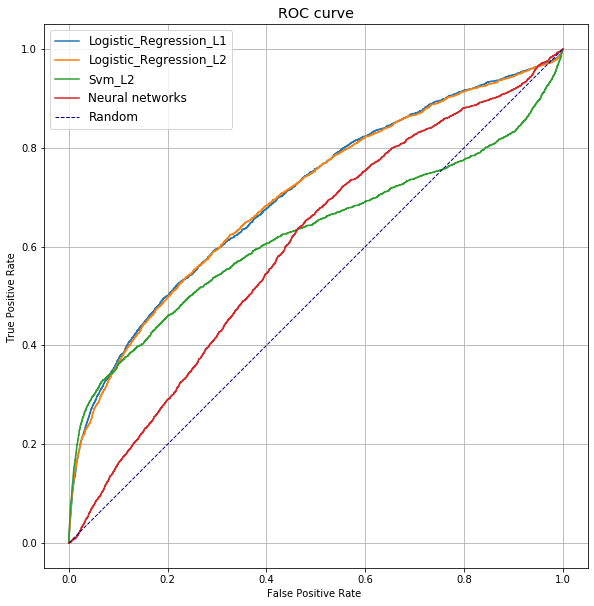

In [23]:
# Draw the ROC curve for each models
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1,label="Logistic_Regression_L1")
plt.plot(fpr2, tpr2,label="Logistic_Regression_L2")
plt.plot(fpr3, tpr3,label="Svm_L2")
plt.plot(fpr4, tpr4,label="Neural networks")
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--',label="Random")
plt.axes().set_aspect('equal')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [24]:
# Calaulate the area under the ROC curve for each model
def area_under_ROC(pro):
        return float(metrics.roc_auc_score(y_test,pro))
Auc = []
models = ['Logistic_Regression_L1','Logistic_Regression_L2','Svm_L2','Neural networks']
for i in [pro_1,pro_2,pro_3,pro_4]:
    Auc.append(area_under_ROC(i))
df_auc = pd.DataFrame(np.array([models,Auc]),index = ['Models','Auc']).T
print(df_auc)

                   Models                 Auc
0  Logistic_Regression_L1  0.7030562984984385
1  Logistic_Regression_L2  0.7012236953273151
2                  Svm_L2  0.6230656118840636
3         Neural networks  0.5963859489081457


/Users/lilinsen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


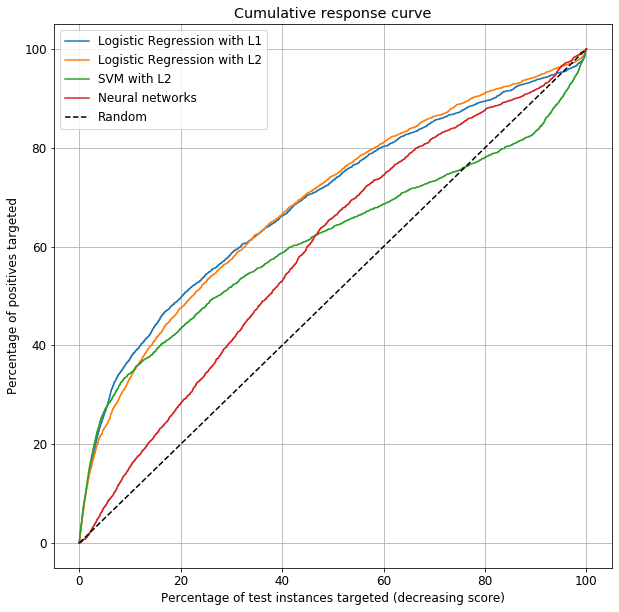

In [25]:
# Draw the cumulative response for each models
def build_cumulative_curve(model, scale=100):
    # Fit model
    model.fit(X_train, y_train)

    # Get the probability of Y_test records being = 1
    if model == SVM_L2:
        Y_test_probability_1 = model.decision_function(X_test)
    else:
        Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    # Sort theseprobabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(y_test)[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    plt.figure(figsize=(10,10))
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing score)")
    plt.ylabel("Percentage of positives targeted")
    plt.title("Cumulative response curve")
    plt.legend()
    plt.grid(True)
    plt.show()

models = {'Logistic Regression with L1': Log_L1,
         'Logistic Regression with L2':Log_L2,
         'SVM with L2':SVM_L2,
         'Neural networks':NN}
plot_cumulative_curve(models)

/Users/lilinsen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


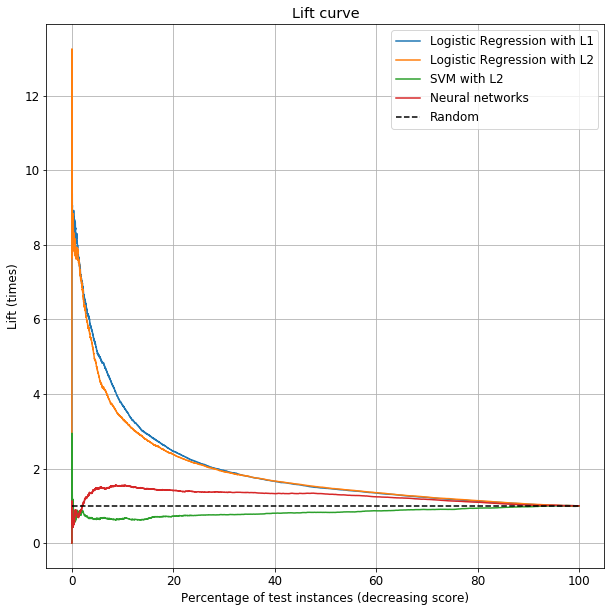

In [26]:
# Draw the lift curves for each models
def plot_lift_curve(models):
    # Plot curve for each model
    plt.figure(figsize=(10,10))
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.grid(True)
    plt.legend()

plot_lift_curve(models)

# P2-3
* Use the best model and select the best parameters using grid search (GridSearchCV).

* Train your best model with the training dataset (credit-data-trainingset.csv).

* Test your model using the test dataset (credit-data-testset.csv) and show its accuracy.

From the result above, we select the Logistic Regression as the best model

In [27]:
from sklearn.model_selection import GridSearchCV
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs) 

lr_penalty= LogisticRegression(solver='liblinear')
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=10, scoring="accuracy")
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [28]:
print ("Best accuracy: %0.3f, using: " % grid.best_score_)
print (grid.best_params_)

Best accuracy: 0.934, using: 
{'C': 0.1, 'penalty': 'l2'}


Now we use the result from GridSearchCV to train the model:

In [33]:
# df_train = pd.read_csv('credit-data-trainingset.csv')
# df_test = pd.read_csv('credit-data-testset.csv')
# X_train = df_train[feature]
# X_test = df_test[feature]
# y_train = df_train[target].values.ravel()
# y_test = df_test[target].values.ravel()

best_model = LogisticRegression(penalty='l2', C=0.1, solver='liblinear',max_iter=10000)
best_model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Test your model using the test dataset (credit-data-testset.csv) and show its accuracy:

In [34]:
print('The accuracy of using best model with best parameters is %.4f ' % (best_model.score(X_test,y_test)))

The accuracy of using best model with best parameters is 0.9326 
